# 逻辑回归

## 导入包

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from my_tools import *

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
jibing_res = pd.read_excel("./jibing_feature_res_final.xlsx")
jibing = pd.read_excel("./jibing_feature_final.xlsx")

In [4]:
jibing.head()

,左右,是否外伤,症状持续时间,明显夜间痛,年龄,高血压,高血脂,2型糖尿病,吸烟与否,饮酒与否,...,腺苷脱氨酶ADA,果糖胺,肌酸激酶,α-L-盐藻糖苷酶,乳酸,淀粉酶,同型半胱氨酸,铁,总铁结合力,血型
0,0,0,3,0,65,1,0,0,0,0,...,10.0,1.32,48.0,12.0,1.9,49.0,9.9,12.3,43.5,3
1,1,1,2,0,62,1,0,0,0,0,...,10.0,1.67,77.0,16.0,1.4,81.0,9.2,16.9,55.5,0
2,1,0,4,1,55,0,0,0,0,0,...,15.0,1.86,78.0,22.0,1.9,89.0,9.9,7.0,51.4,0
3,1,0,3,0,60,0,0,0,0,0,...,16.0,1.68,92.0,12.0,1.4,69.0,9.3,15.8,53.0,0
4,0,1,3,0,61,0,0,0,0,0,...,13.0,1.60,58.0,14.0,1.7,153.0,8.1,13.2,45.9,0


In [5]:
jibing_res.head()

,结果
0,0
1,1
2,1
3,0
4,1


### 归一化

In [6]:
jibing = guiyihua(jibing)

### 标准化

In [7]:
jibing = biaozhunhua(jibing)

In [8]:
jibing.iloc[0]

左右               0.000000
是否外伤             0.000000
症状持续时间           3.000000
明显夜间痛            0.000000
年龄               0.402864
高血压              1.000000
高血脂              0.000000
2型糖尿病            0.000000
吸烟与否             0.000000
饮酒与否            -0.448892
红细胞计数*10^12/L   -0.111242
血红蛋白            -1.262287
红细胞压积           -0.628449
血小板计数            1.836626
血小板压积           -0.016066
总蛋白g/L           0.117665
白蛋白g/L          -0.783686
球蛋白g/L           0.892589
白球比             -1.141215
ALT丙氨酸氨基转移酶     -0.955624
碱性磷酸酶            0.577122
谷氨酸转肽酶          -0.458009
AST:ALT          1.972187
总胆红素            -0.567388
直接胆红素            0.058454
间接胆红素           -0.700329
钾                1.331665
钠               -0.154827
氯               -0.203053
钙               -1.011273
磷               -0.094543
镁                1.419808
葡萄糖             -0.813153
肌酐               0.219459
尿素               0.950509
尿酸              -0.222815
甘油三酯             0.111053
总胆固醇             0.102856
H高密度胆固醇     

### 要调的参数
- penalty：惩罚项，L1 正则化和 L2 正则化。
L2 正则化通常会导致模型的参数值变小，使得模型的决策边界会更平滑。它也可以帮助防止过拟合。所以这里选择l2 正则化
- c:正则化系数的倒数
- 对于l2 正则化，可以选择 newton-cg，lbfgs，saga

  saga:随机平均梯度下降
  
  newton-cg:类似于牛顿法
  
  lbfgs:一种梯度下降的方法

### 训练

In [13]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(jibing,jibing_res,test_size=0.3)
clf = LogisticRegression(C=c, solver=solver,random_state=30)
clf.fit(Xtrain, Ytrain)
# 预测
y_pre = clf.predict(Xtest)
metrics_ = res_metrics(Ytest,y_pre,"逻辑回归")

#######################逻辑回归#######################
+--------------------+--------+-----+
|     precision      | recall |  f1 |
+--------------------+--------+-----+
| 0.7729340277777778 |  0.0   | 0.0 |
+--------------------+--------+-----+


### 召回率为0可能是样本不均衡导致的，使得算法以多数类为主

### 一个阳性也没有检测出来

## 为解决样本不均衡问题
## 使用 SMOTE 补充数据
## SMOTE：插值的方法扩充数据

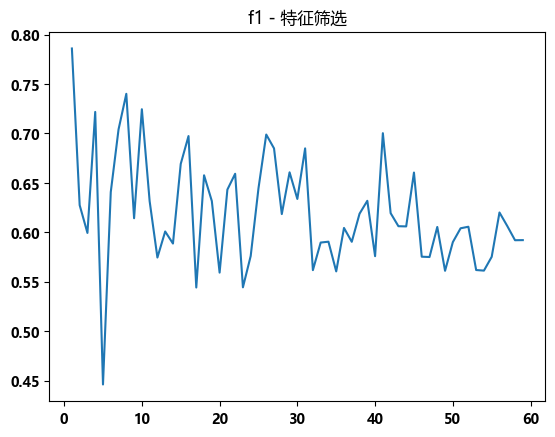

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE
f1_list = []
set_font()
for i in range(1,60):
    smote = SMOTE(sampling_strategy=1, random_state=42)
    selector = SelectKBest(mutual_info_classif, k=i)
    jibing_ = selector.fit_transform(jibing, jibing_res)
    Xtrain,Xtest,Ytrain,Ytest = train_test_split(jibing_,jibing_res,test_size=0.3,random_state=42)
    Xtrain, Ytrain = smote.fit_resample(Xtrain,Ytrain)    
    clf = LogisticRegression(random_state=42)
    clf.fit(Xtrain, Ytrain)
    y_pre = clf.predict(Xtest)
    metrics_ = res_metrics(Ytest,y_pre,"调参")
    f1_list.append(metrics_["f1-score"])
zhexiantu(range(1,60),f1_list,"f1 - 特征筛选")

### 发现 f1-score 的最高值出现在 0-10 之间

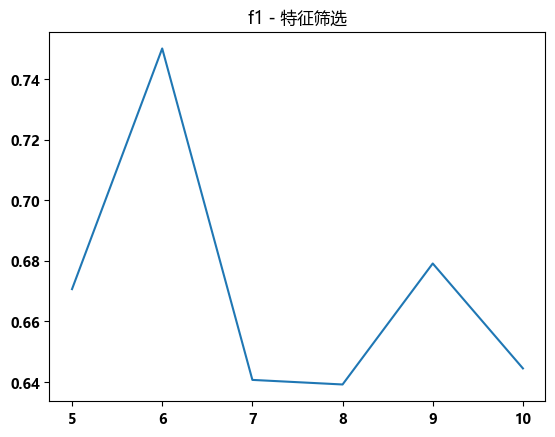

In [20]:
f1_list=[]
for i in range(5,11):
    smote = SMOTE(sampling_strategy=1, random_state=42)
    selector = SelectKBest(mutual_info_classif, k=i)
    jibing_ = selector.fit_transform(jibing, jibing_res)
    Xtrain,Xtest,Ytrain,Ytest = train_test_split(jibing_,jibing_res,test_size=0.3,random_state=42)
    Xtrain, Ytrain = smote.fit_resample(Xtrain,Ytrain)
    clf = LogisticRegression(random_state=42)
    clf.fit(Xtrain, Ytrain)
    y_pre = clf.predict(Xtest)
    metrics_ = res_metrics(Ytest,y_pre,"调参")
    f1_list.append(metrics_["f1-score"])
zhexiantu(range(5,11),f1_list,"f1 - 特征筛选")

### 选取最佳的6个特征进行训练，K = 6

In [26]:
smote = SMOTE(sampling_strategy=1, random_state=42)
selector = SelectKBest(mutual_info_classif, k=6)
jibing_ = selector.fit_transform(jibing, jibing_res)
Xtrain,Xtest,Ytrain,Ytest = train_test_split(jibing_,jibing_res,test_size=0.3,random_state=42)

Xtrain, Ytrain = smote.fit_resample(Xtrain,Ytrain)
clf = LogisticRegression(random_state=42)
clf.fit(Xtrain, Ytrain)

y_pre = clf.predict(Xtest)
metrics_ = res_metrics(Ytest,y_pre,"f1 - k=6")

#####################f1 - k=6#####################
+--------------------+--------------------+--------------------+
|     precision      |       recall       |         f1         |
+--------------------+--------------------+--------------------+
| 0.8265539116030419 | 0.6724137931034483 | 0.7415586728925839 |
+--------------------+--------------------+--------------------+


### 尝试降维
### PCA

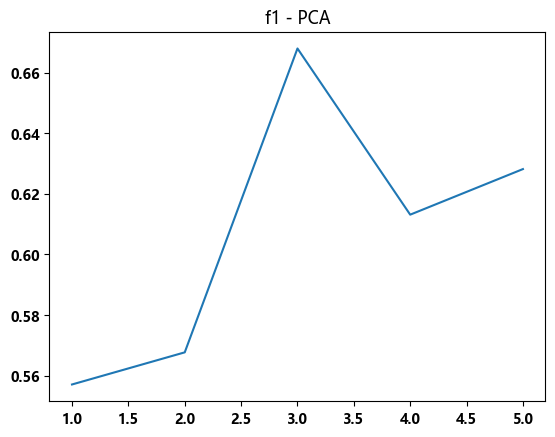

In [29]:
f1_list = []
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
for i in range(1,6):
    clf = LogisticRegression(random_state=42)
    pca = PCA(n_components=i,random_state=42)
    Xtrain_ = pca.fit_transform(Xtrain,Ytrain)
    clf.fit(Xtrain_, Ytrain)
    Xtest_ = pca.fit_transform(Xtest)
    y_pre = clf.predict(Xtest_)
    metrics_ = res_metrics(Ytest,y_pre,"调参")
    f1_list.append(metrics_["f1-score"])
zhexiantu(range(1,6),f1_list,"f1 - PCA")

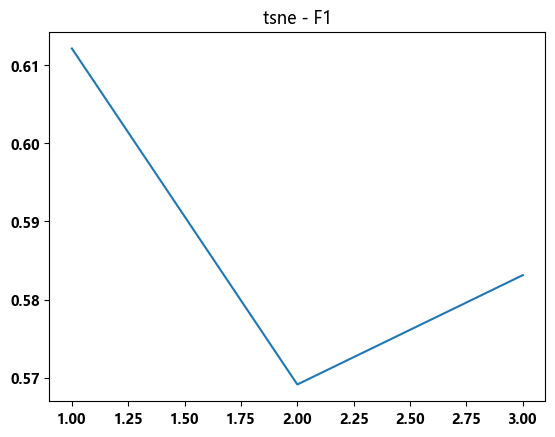

In [31]:
f1_list = []
from sklearn.manifold import TSNE
for i in range(1,4):
    clf = LogisticRegression(random_state=42)
    tsne = TSNE(n_components=i,random_state=42)
    Xtrain_ = tsne.fit_transform(Xtrain,Ytrain)
    clf.fit(Xtrain_, Ytrain)
    Xtest_ = tsne.fit_transform(Xtest)
    y_pre = clf.predict(Xtest_)
    metrics_ = res_metrics(Ytest,y_pre,"调参")
    f1_list.append(metrics_["f1-score"])
zhexiantu(range(1,4),f1_list,"tsne - F1")

### 放弃降维，直接使用 K = 6 的特征筛选

In [32]:
smote = SMOTE(sampling_strategy=1, random_state=42)
selector = SelectKBest(mutual_info_classif, k=6)
jibing_ = selector.fit_transform(jibing, jibing_res)
Xtrain,Xtest,Ytrain,Ytest = train_test_split(jibing_,jibing_res,test_size=0.3,random_state=42)
Xtrain, Ytrain = smote.fit_resample(Xtrain,Ytrain)
# 训练，拟合
clf = LogisticRegression(random_state=42)
clf.fit(Xtrain, Ytrain)
y_pre = clf.predict(Xtest)
metrics_ = res_metrics(Ytest,y_pre,"逻辑回归-特征筛选")

####################逻辑回归-特征筛选#####################
+--------------------+--------------------+--------------------+
|     precision      |       recall       |         f1         |
+--------------------+--------------------+--------------------+
| 0.8263447971781305 | 0.7068965517241379 | 0.7619678246723789 |
+--------------------+--------------------+--------------------+


## 最高的 f1-score 为0.76